In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input/COVID-19-time-series-clean-complete.csv')

In [7]:
df.head(5)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

df.head(5)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,2020-01
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,2020-01
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,2020-01
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,2020-01
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,2020-01


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Country/Region', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
       'YearMonth'],
      dtype='object')

8 countries with highest corona

In [23]:
df_date_country = df.groupby(['YearMonth', 'Country/Region'])['Confirmed'].sum().reset_index()

df_date_country

,YearMonth,Country/Region,Confirmed
0,2020-01,Afghanistan,0
1,2020-01,Albania,0
2,2020-01,Algeria,0
3,2020-01,Andorra,0
4,2020-01,Angola,0
...,...,...,...
3855,2021-08,Vietnam,1053678
3856,2021-08,West Bank and Gaza,1903849
3857,2021-08,Yemen,42568
3858,2021-08,Zambia,1185287


In [24]:
df_april_2020 = df_date_country.query("YearMonth == '2020-04'")

df_april_2020

,YearMonth,Country/Region,Confirmed
579,2020-04,Afghanistan,27074
580,2020-04,Albania,15632
581,2020-04,Algeria,69497
582,2020-04,Andorra,19106
583,2020-04,Angola,601
...,...,...,...
767,2020-04,Vietnam,7778
768,2020-04,West Bank and Gaza,8597
769,2020-04,Yemen,31
770,2020-04,Zambia,1754


In [25]:
top_8_countries = df_april_2020.sort_values(by='Confirmed', ascending=False).head(8)

top_8_countries

,YearMonth,Country/Region,Confirmed
758,2020-04,US,19960815
741,2020-04,Spain,5236777
663,2020-04,Italy,4928524
644,2020-04,Germany,3942925
640,2020-04,France,3456319
762,2020-04,United Kingdom,3328344
615,2020-04,China,2500143
659,2020-04,Iran,2255837


In [26]:
print(top_8_countries['Country/Region'].tolist())

['US', 'Spain', 'Italy', 'Germany', 'France', 'United Kingdom', 'China', 'Iran']


Plot the death rate in Iran on different days

In [27]:
Iran_data = df[df['Country/Region'] == 'Iran']

Iran_data.head(5)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,2020-01
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,2020-01
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,2020-01
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,2020-01
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,2020-01


In [34]:
Iran_data_april_2020 = Iran_data.query("YearMonth == '2020-04'")

Iran_data_april_2020.head(5)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
13590,13590,2020-04-01,Iran,47593,3036,15473.0,29084.0,2988,138,817,2020-04
13783,13783,2020-04-02,Iran,50468,3160,16711.0,30597.0,2875,124,1238,2020-04
13976,13976,2020-04-03,Iran,53183,3294,17935.0,31954.0,2715,134,1224,2020-04
14169,14169,2020-04-04,Iran,55743,3452,19736.0,32555.0,2560,158,1801,2020-04
14362,14362,2020-04-05,Iran,58226,3603,19736.0,34887.0,2483,151,0,2020-04


In [46]:
Iran_data_april_2020['Death Rate'] = Iran_data_april_2020['New cases'] / Iran_data_april_2020['New deaths'] * 100

Iran_data_april_2020.head(5)

C:\Users\USER\AppData\Local\Temp\ipykernel_12420\3948349490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iran_data_april_2020['Death Rate'] = Iran_data_april_2020['New cases'] / Iran_data_april_2020['New deaths'] * 100


,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth,Death Rate
13590,13590,2020-04-01,Iran,47593,3036,15473.0,29084.0,2988,138,817,2020-04,2165.217391
13783,13783,2020-04-02,Iran,50468,3160,16711.0,30597.0,2875,124,1238,2020-04,2318.548387
13976,13976,2020-04-03,Iran,53183,3294,17935.0,31954.0,2715,134,1224,2020-04,2026.119403
14169,14169,2020-04-04,Iran,55743,3452,19736.0,32555.0,2560,158,1801,2020-04,1620.253165
14362,14362,2020-04-05,Iran,58226,3603,19736.0,34887.0,2483,151,0,2020-04,1644.370861


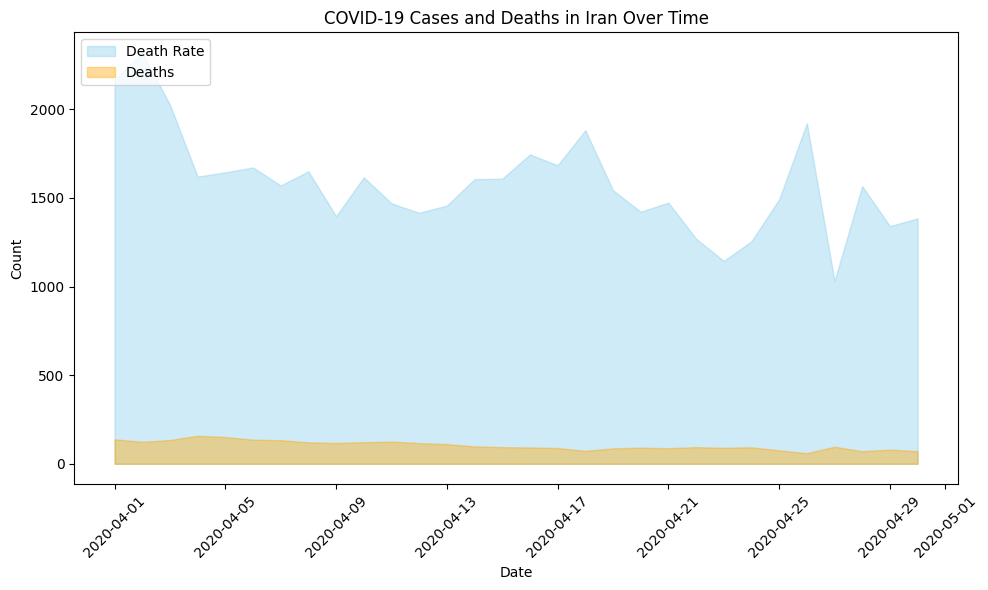

In [49]:
plt.figure(figsize=(10, 6))

plt.fill_between(Iran_data_april_2020['Date'], Iran_data_april_2020['Death Rate'], color="skyblue", alpha=0.4, label='Death Rate')
plt.fill_between(Iran_data_april_2020['Date'], Iran_data_april_2020['New deaths'], color="orange", alpha=0.4, label='Deaths')

plt.legend(loc='upper left')
plt.title('COVID-19 Cases and Deaths in Iran Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()